In [2]:
import numpy
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import csv file
df = pd.read_csv(r'C:\Users\hp\Data Science\archive\Hackathon_Mapping_File.csv', encoding= 'unicode_escape')

In [6]:
df.shape

(24, 3)

In [7]:
df.head(100)

,File Name,Column Name,Column Description
0,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
1,NaN,STORECODE,"STORE CODE (P1, P2, â¦, P10)"
2,NaN,QTY,Sales Unit
3,NaN,VALUE,Sales Value
4,NaN,GRP,Category
5,NaN,SGRP,Subcategory
6,NaN,SSGRP,Sub Sub Category
7,NaN,CMP,Company/Manufacturer
8,NaN,MBRD,Mother Brand
9,NaN,BRD,Brand


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   File Name           2 non-null      object
 1   Column Name         24 non-null     object
 2   Column Description  24 non-null     object
dtypes: object(3)
memory usage: 708.0+ bytes


In [9]:
pd.isnull(df)

,File Name,Column Name,Column Description
0,False,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,False
7,True,False,False
8,True,False,False
9,True,False,False


In [10]:
pd.isnull(df).sum()

File Name             22
Column Name            0
Column Description     0
dtype: int64

In [11]:
pd.isnull(df).sum()

File Name             22
Column Name            0
Column Description     0
dtype: int64

In [14]:
df.columns

Index(['File Name', 'Column Name', 'Column Description'], dtype='object')

In [13]:
df.describe()

,File Name,Column Name,Column Description
count,2,24,24
unique,2,14,15
top,Hackathon_Ideal_Data,MONTH,"Month ID (M1, M2, M3)"
freq,1,2,2


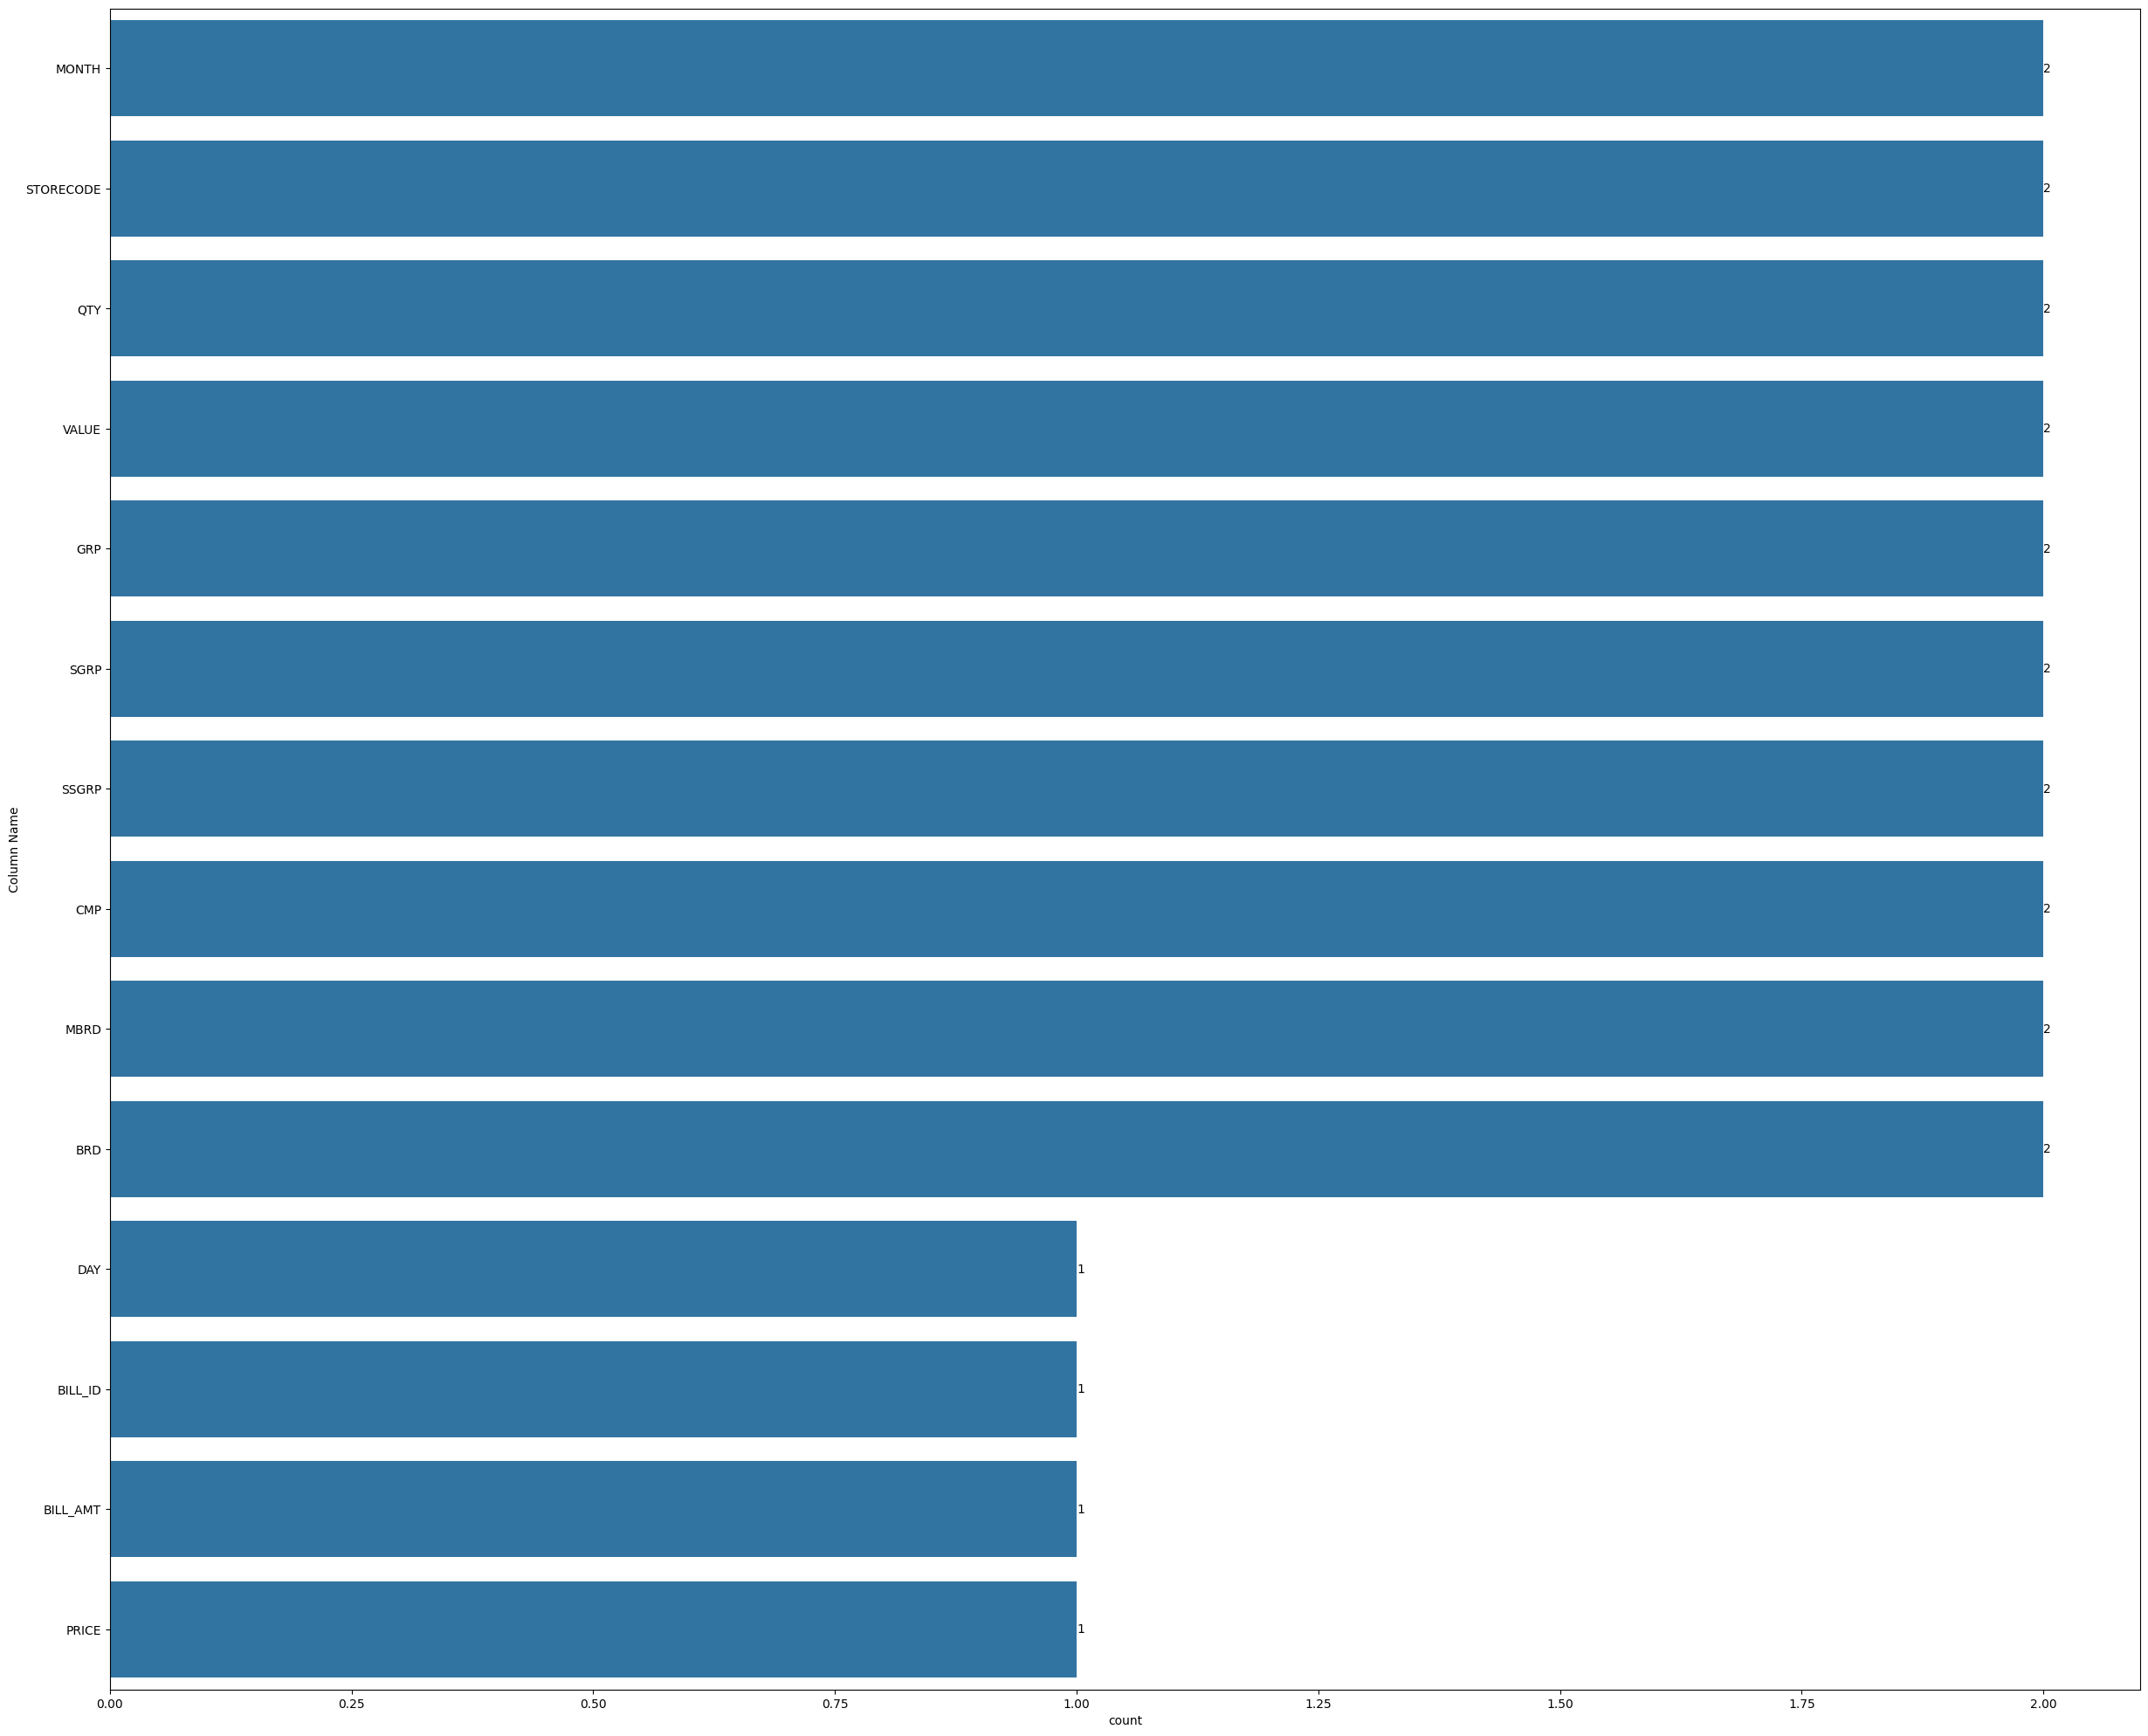

In [14]:
plt.figure(figsize=(30, 25))  # Adjust width and height as needed
ax = sns.countplot(y='Column Name', data=df)
for bars in ax.containers:
    ax.bar_label(bars)

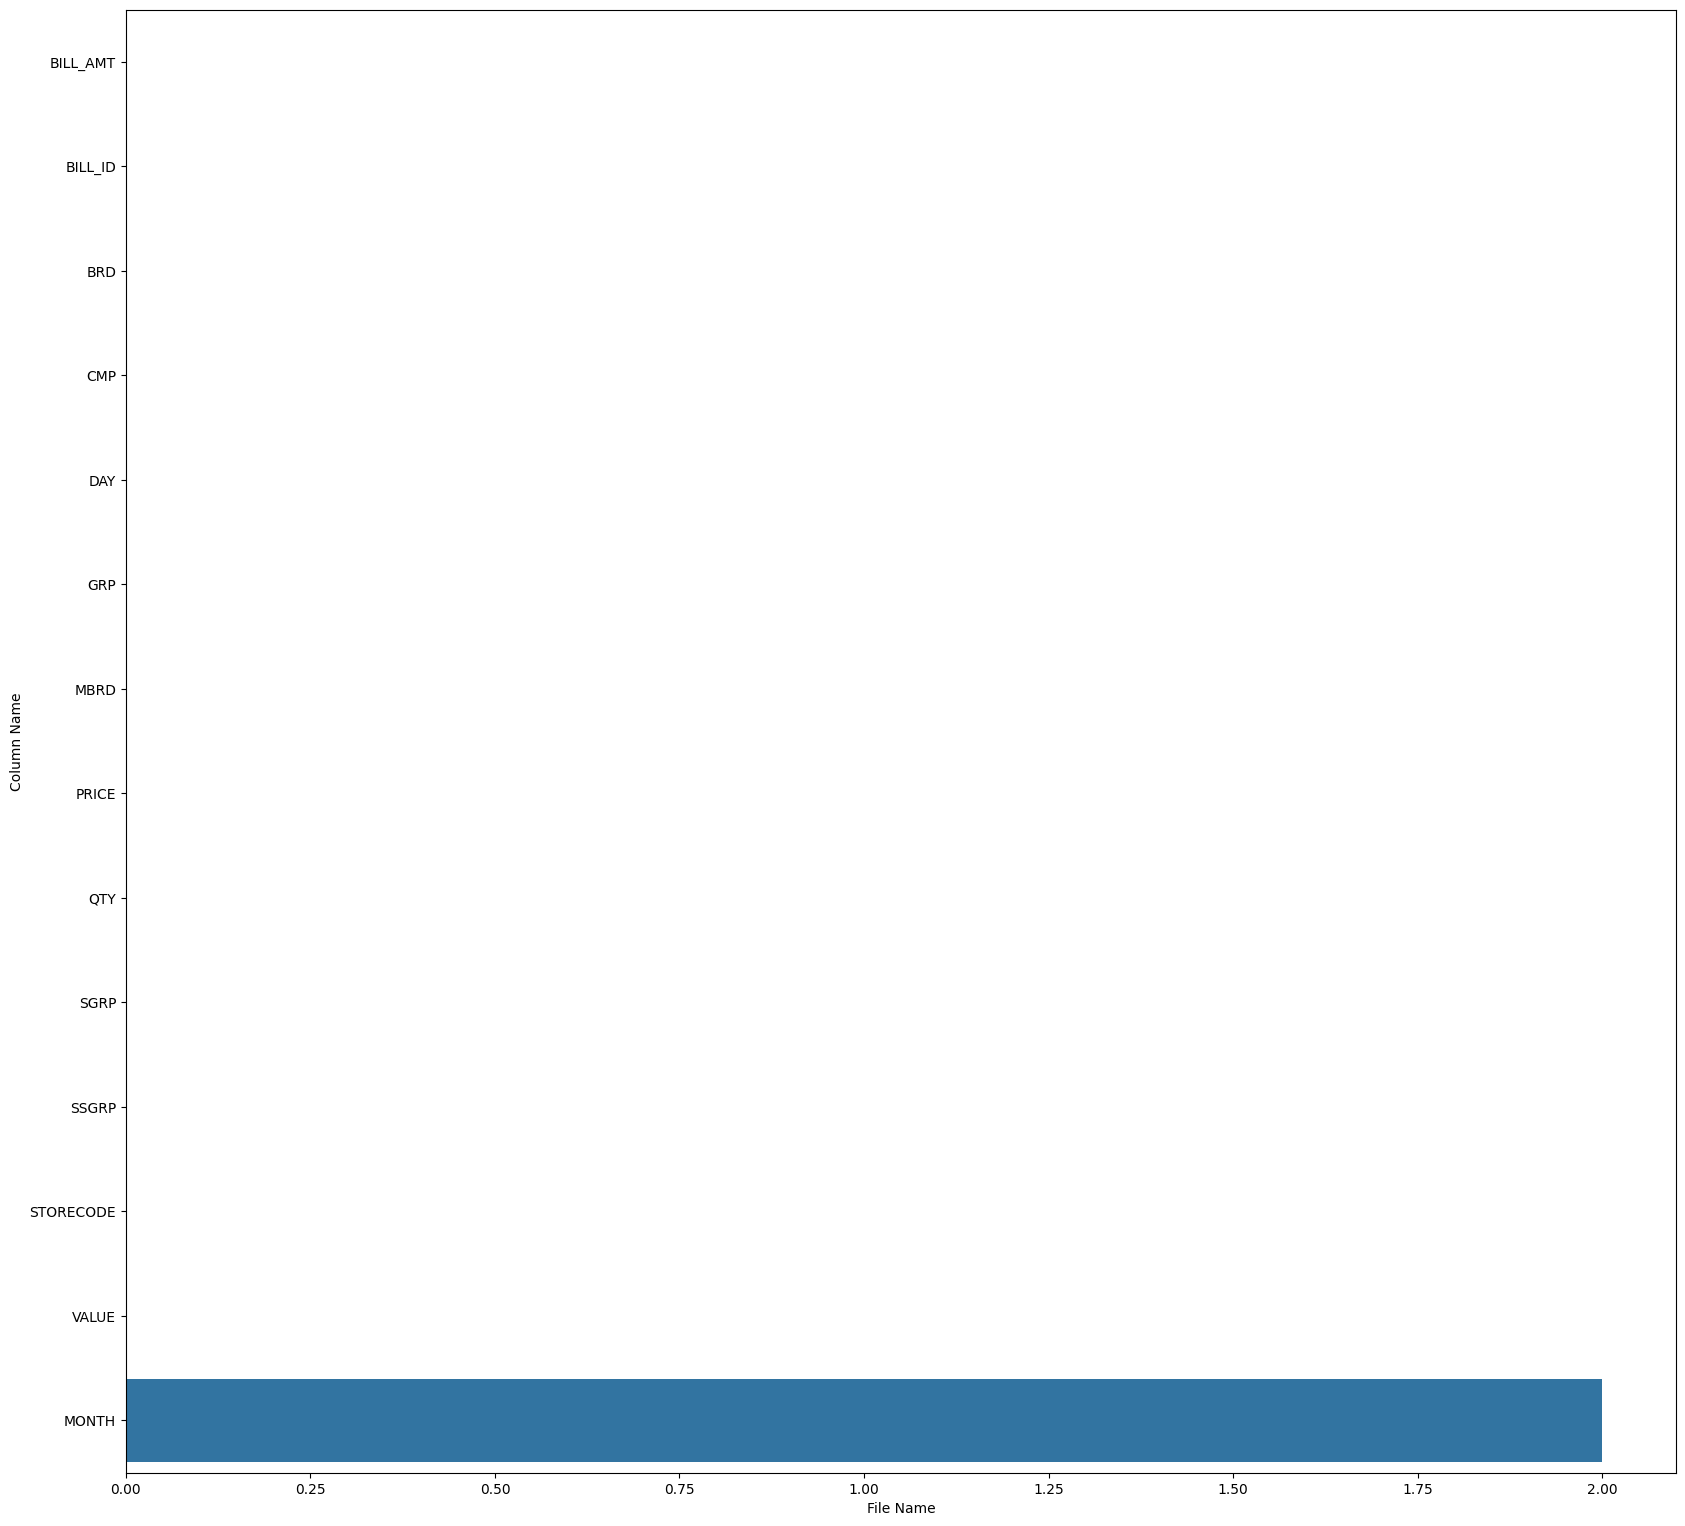

In [6]:
plt.figure(figsize=(20, 19))
a = df.groupby(['Column Name'], as_index=False)['File Name'].count().sort_values(by='File Name', ascending=True)
sns.barplot(x='File Name', y='Column Name', data=a)
plt.show()


C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


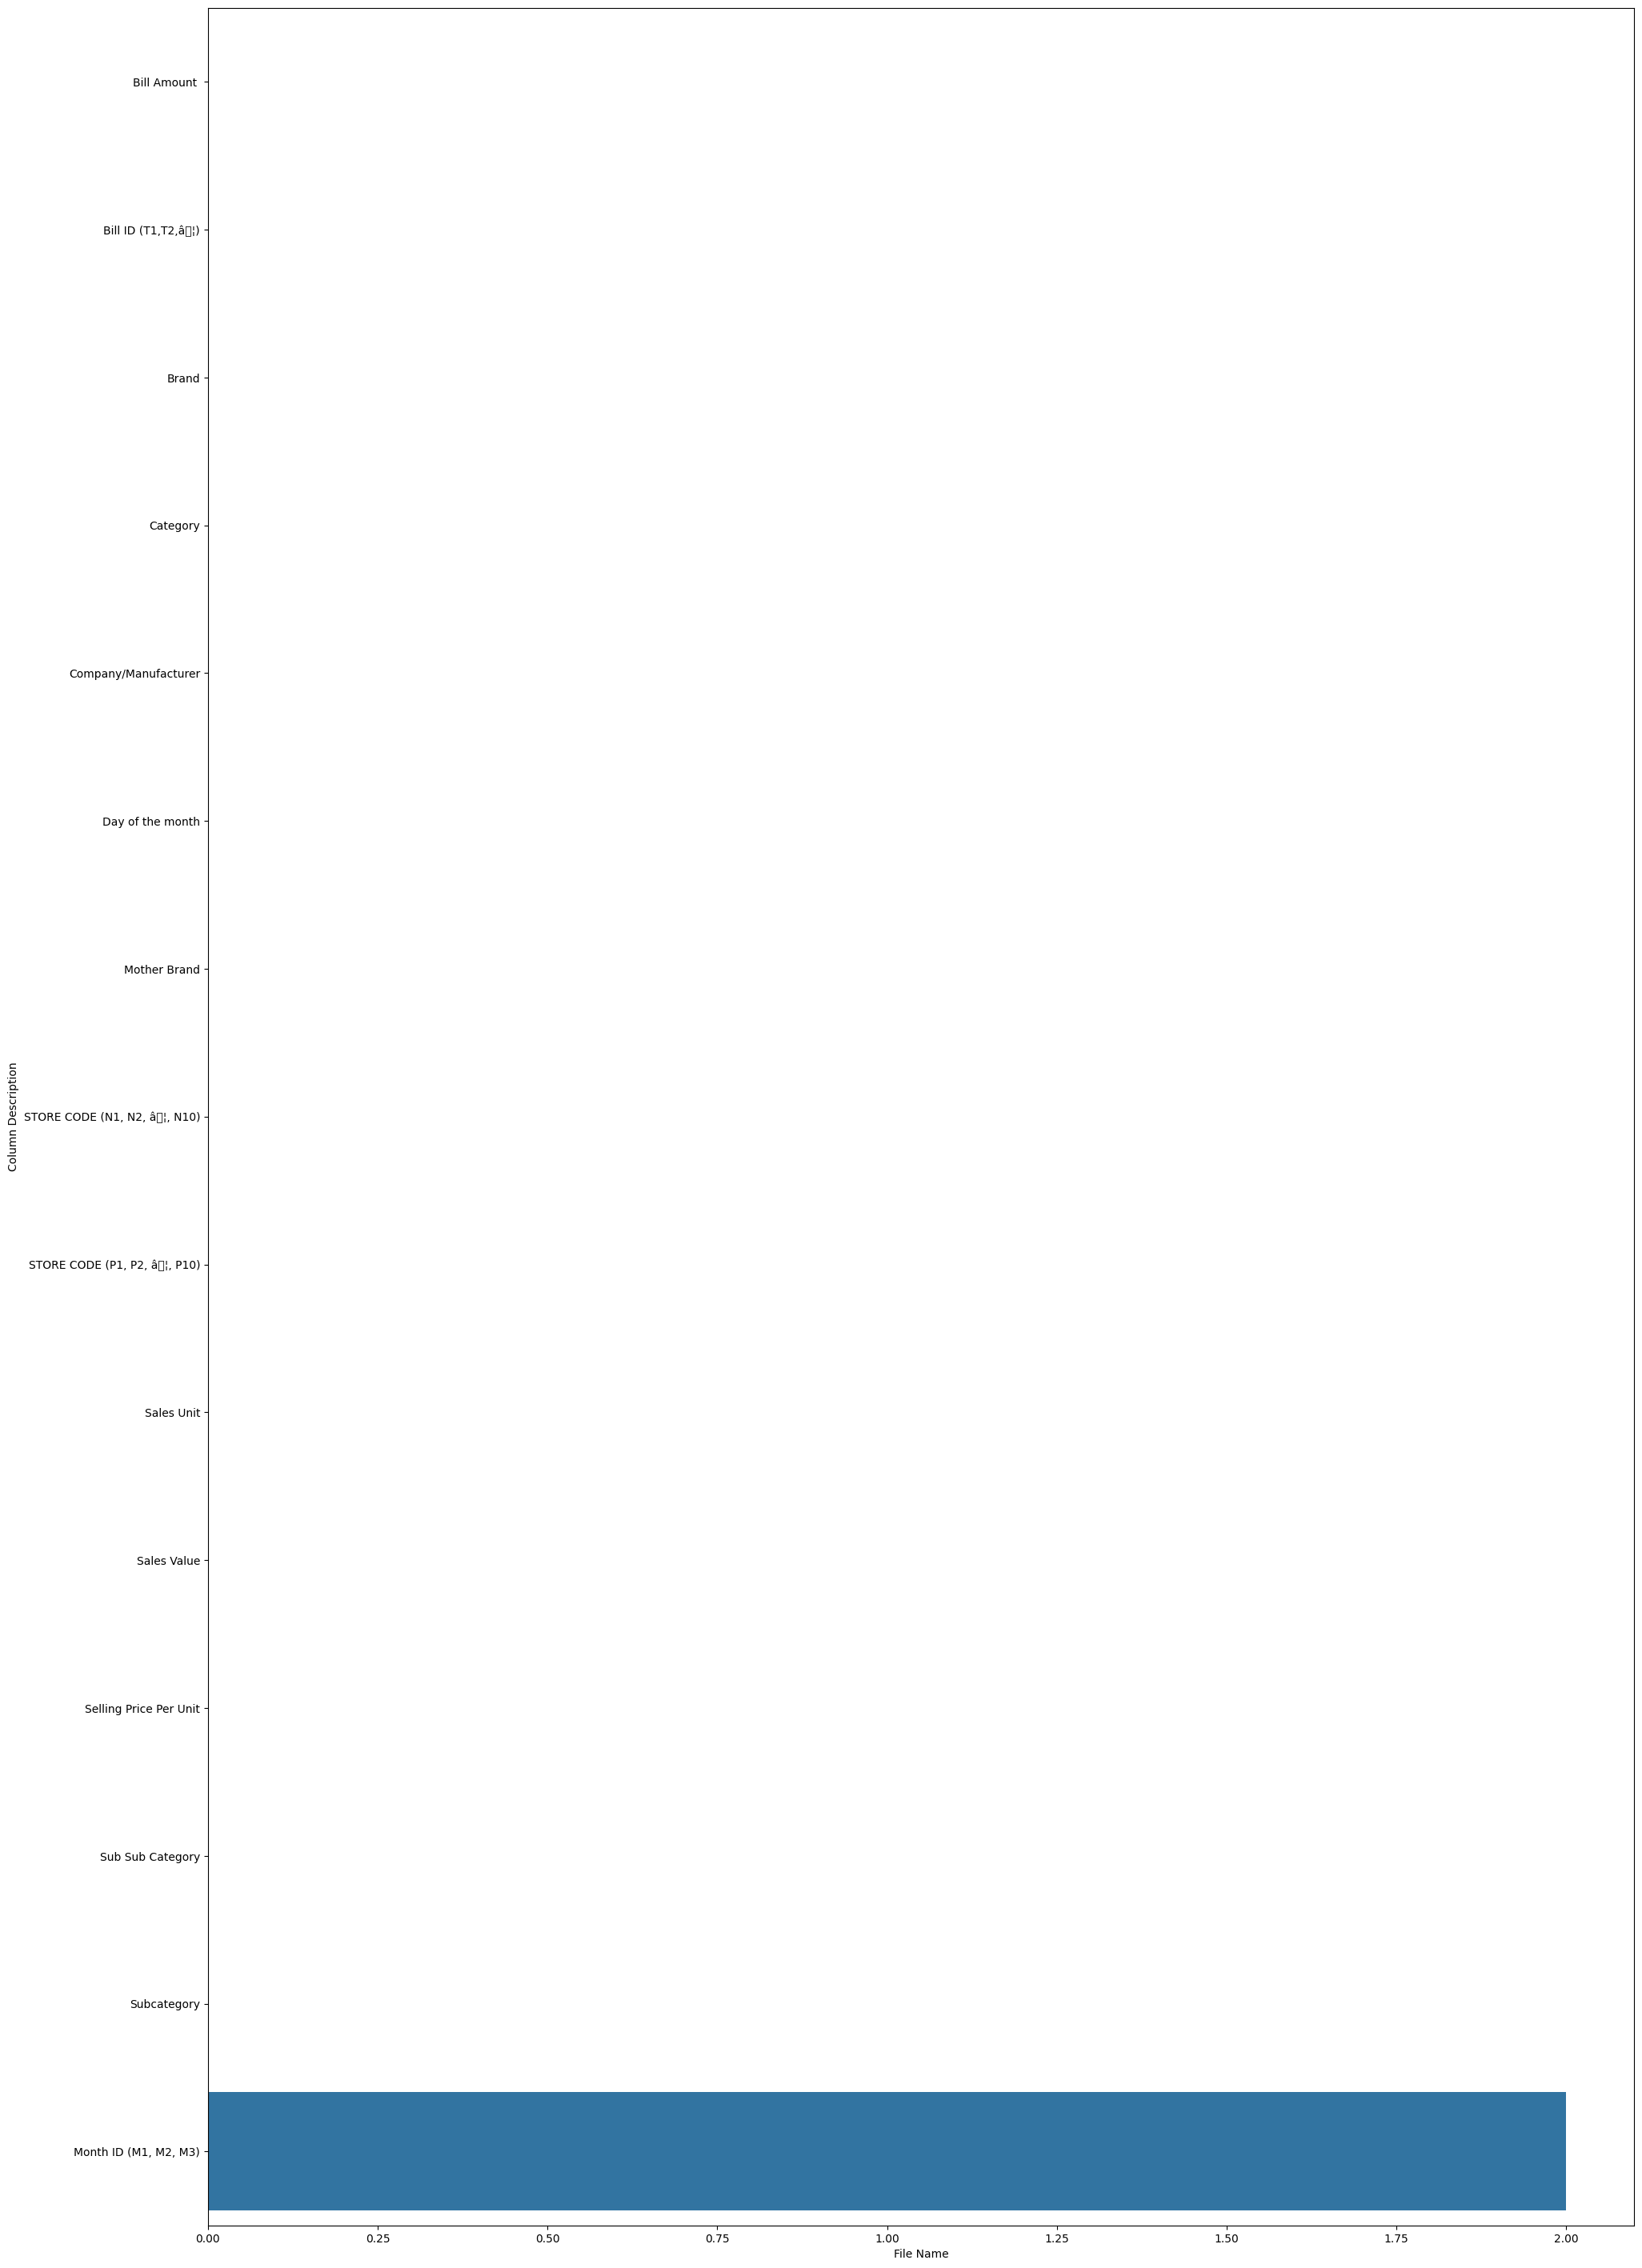

In [5]:
plt.figure(figsize=(23, 36))
a = df.groupby(['Column Description'], as_index=False)['File Name'].count().sort_values(by='File Name', ascending=True)
sns.barplot(x='File Name', y='Column Description', data=a)
plt.show()


(-1.0999999695857423,
 1.099999969585698,
 -1.0999999709466133,
 1.0999999981644766)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


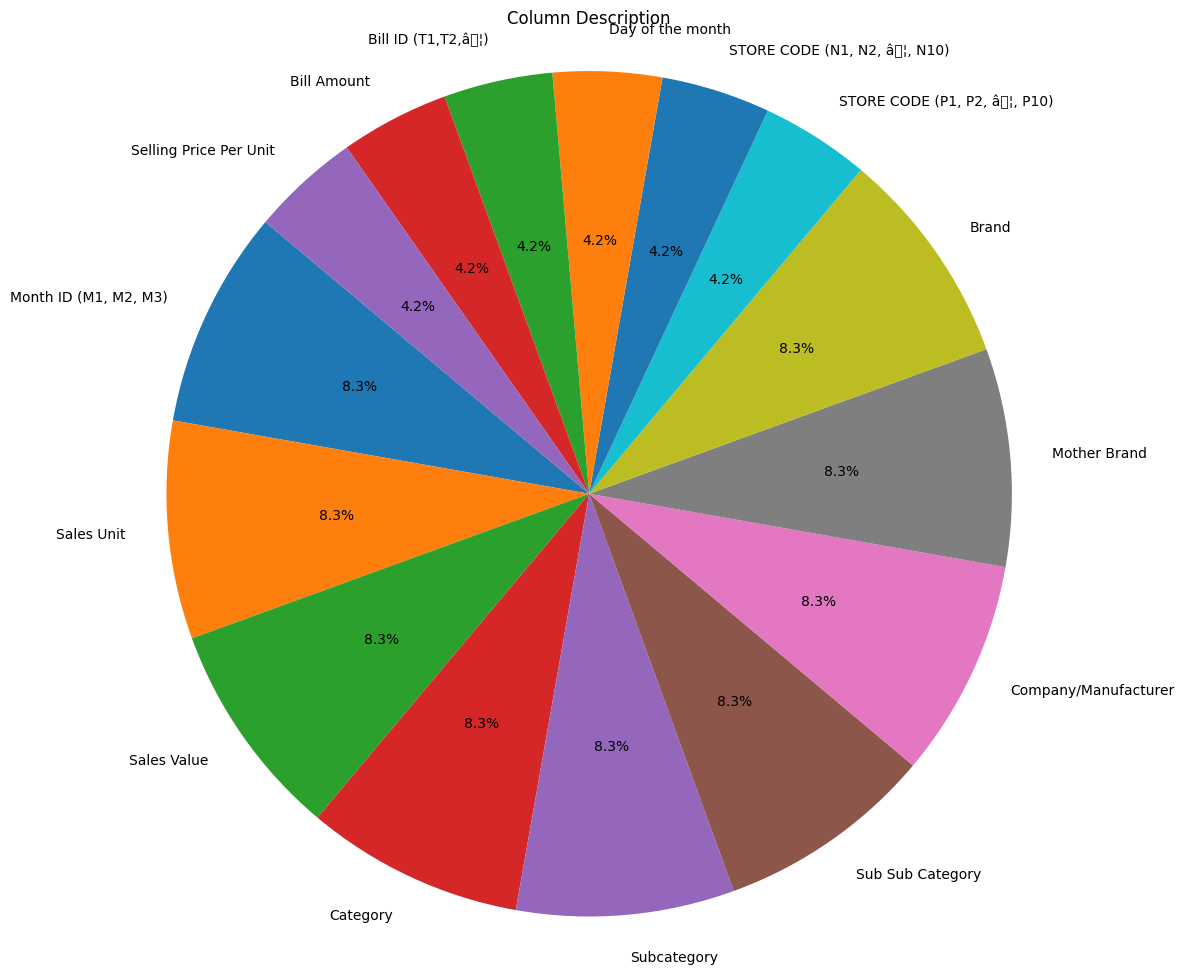

In [13]:
grp_counts = df['Column Description'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(12, 12))
plt.pie(grp_counts, labels=grp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Column Description')
plt.axis('equal')

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


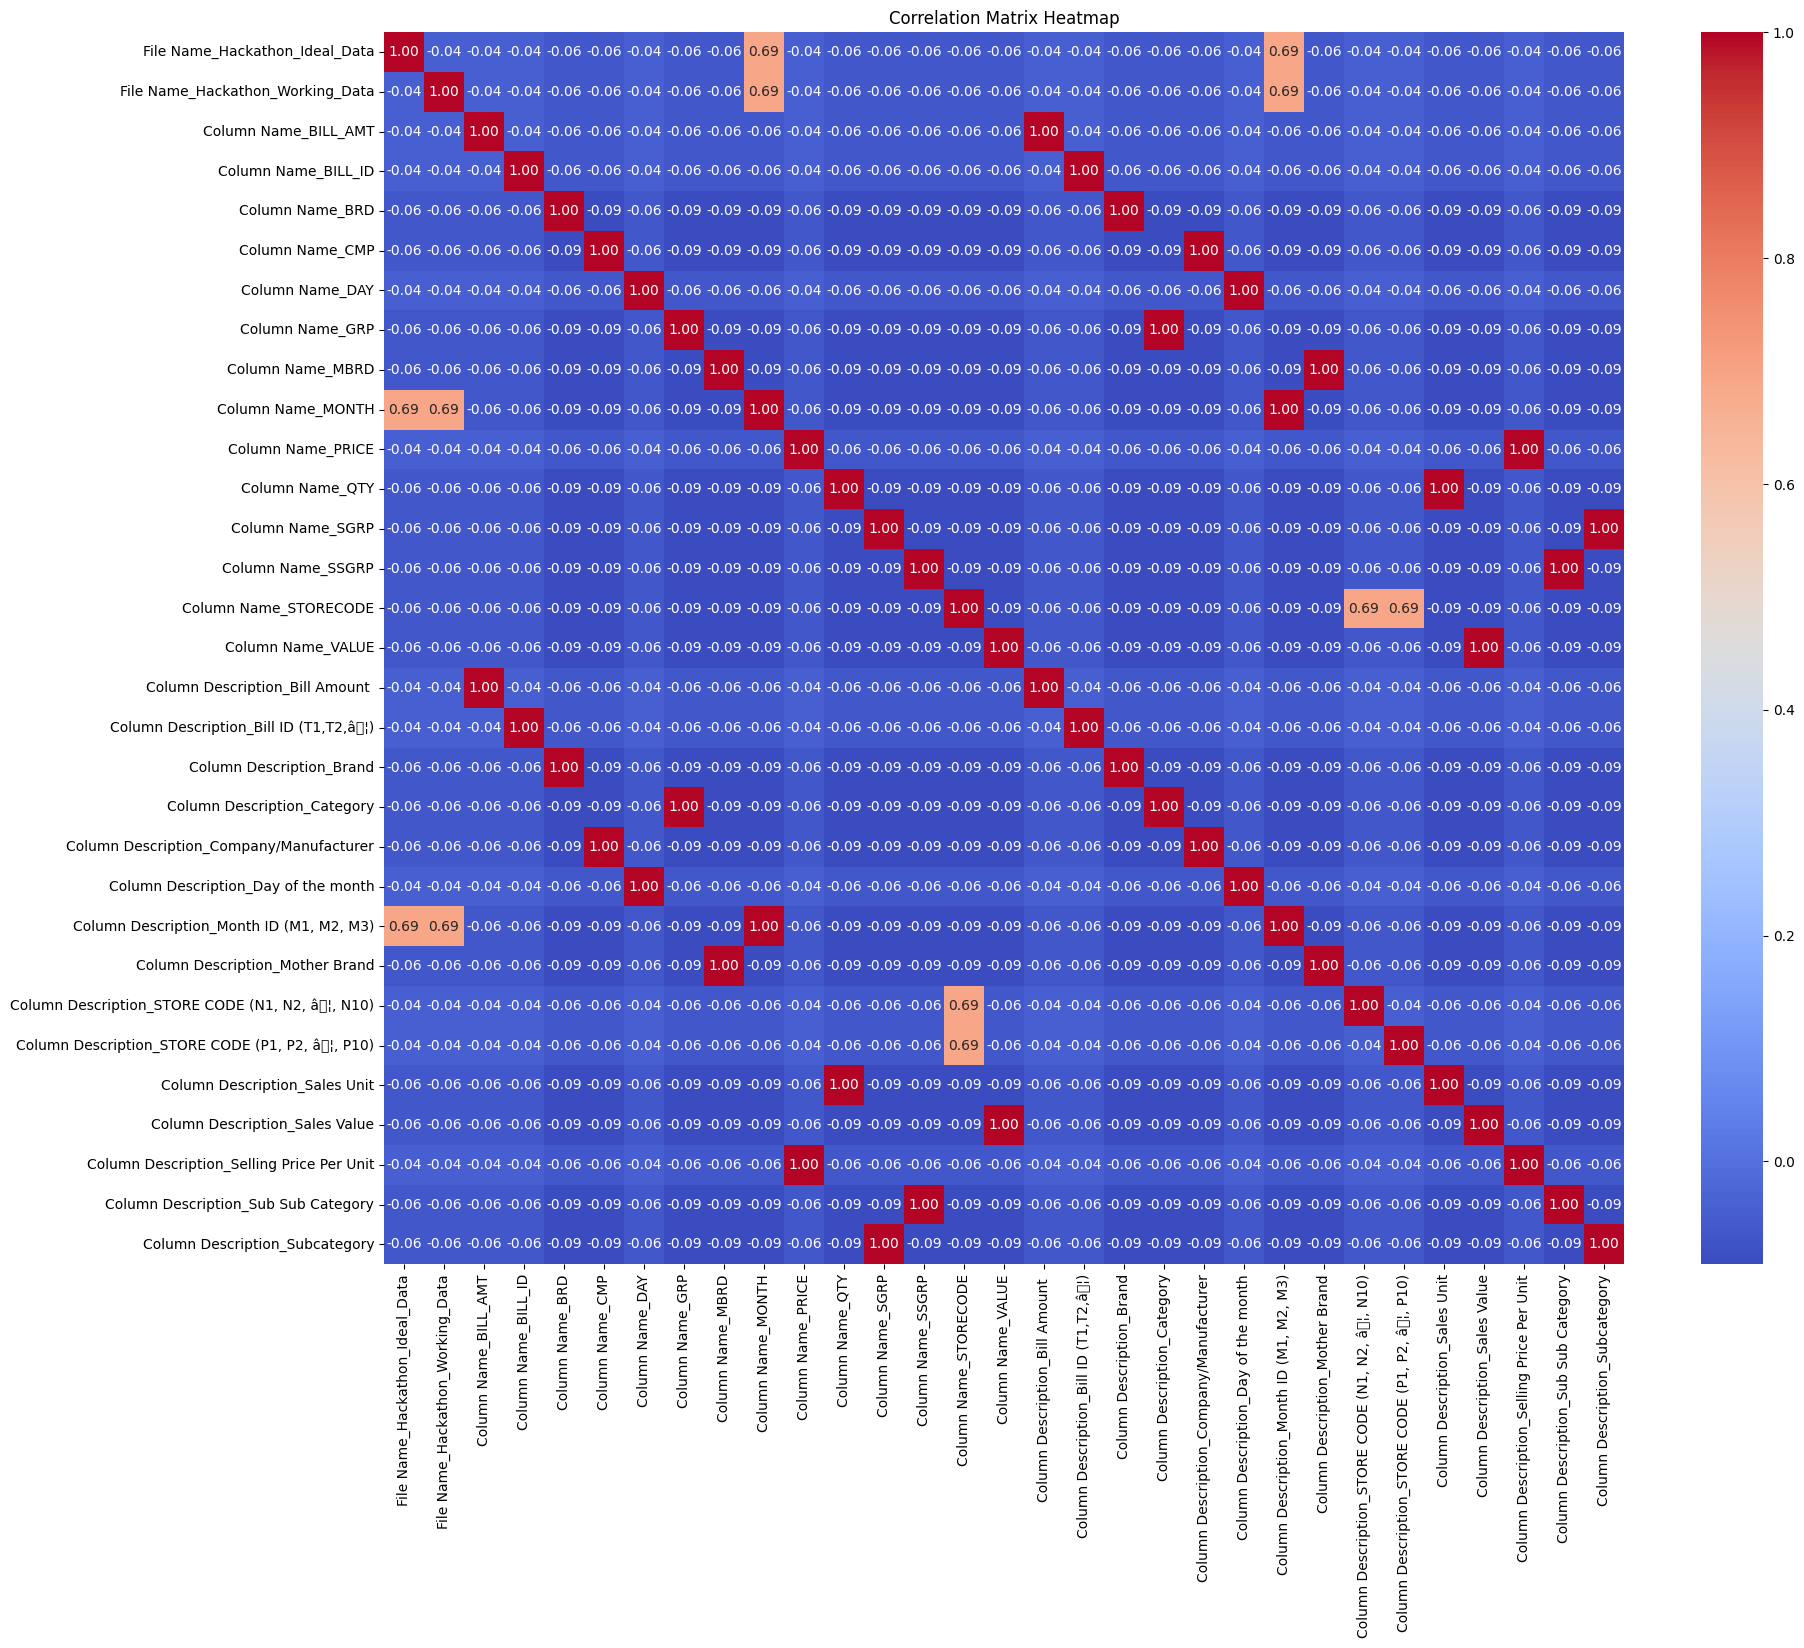

In [15]:
# Extract these columns for analysis
columns_of_interest = ['File Name', 'Column Name', 'Column Description']
data_subset = df[columns_of_interest]

# One-hot encode categorical variables
data_subset = pd.get_dummies(data_subset, columns=['File Name', 'Column Name', 'Column Description'])

# Calculate the correlation matrix
correlation_matrix = data_subset.corr()

# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')

(-1.0999999695857423,
 1.099999969585698,
 -1.0999999709466133,
 1.0999999981644766)

C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128 (\x80) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


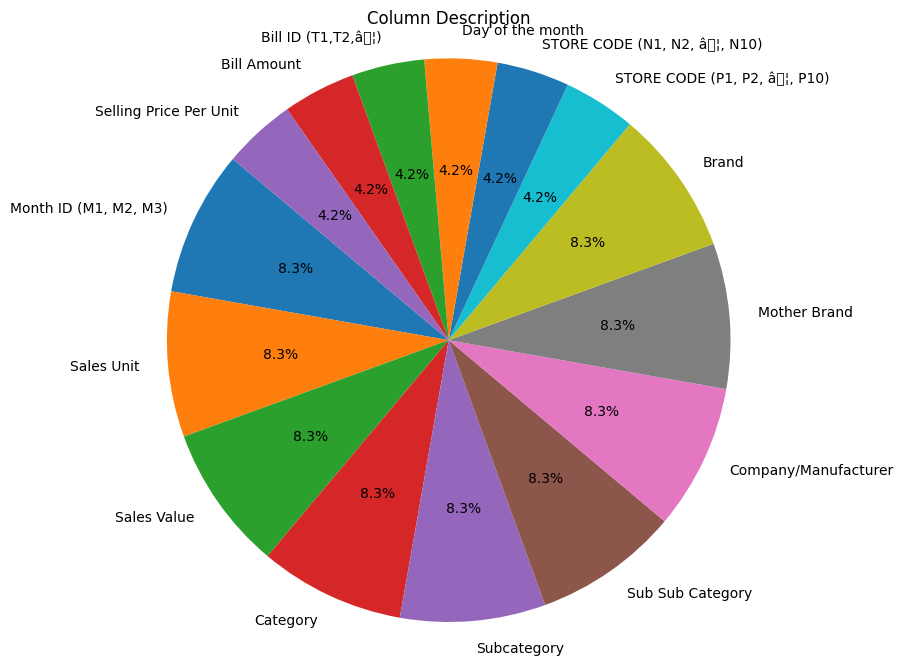

In [16]:
grp_counts = df['Column Description'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(grp_counts, labels=grp_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Column Description')
plt.axis('equal')

In [ ]:
plt.figure(figsize=(35, 85))
a=df.groupby(['CMP'],as_index=False)['QTY'].sum().sort_values(by='QTY',ascending=True)
sns.barplot(x='QTY',y='CMP',data=a)